# Algorithm Comparison

Compare four graph coloring algorithms:
- **Backtracking**: Finds optimal (minimum) number of colors
- **Greedy**: Fast heuristic, finds a coloring
- **DSATUR**: Heuristic using saturation degree
- **Simulated Annealing**: Requires a fixed number of colors k, tries to find valid coloring

**Note**: Simulated annealing needs k (number of colors) as input. We'll use the minimum found by other algorithms.


In [106]:
# Setup
import sys
import os
sys.path.append(os.path.dirname(os.getcwd()))

import matplotlib.pyplot as plt
import numpy as np

# Import graph generators
from src.graph_generators import (
    cycle_graph, complete_graph, path_graph, star_graph, 
    bipartite_graph, random_graph
)

# Import algorithms
from src.backtracking import backtracking_coloring
from src.greedy import greedy_coloring
from src.dsatur import dsatur_coloring
from src.annealing import simulated_annealing


## Experiment 1: Compare on Different Graph Types

For each graph type, run all algorithms and print results.


In [107]:
# Set the number of vertices
n = 15

# Store results for later use in visualizations
results = {}

# Test cycle graph
print(f"CYCLE GRAPH (n={n}:")
g = cycle_graph(n)
bt = backtracking_coloring(g)
gr = greedy_coloring(g)
ds = dsatur_coloring(g)
# Use minimum colors found by other algorithms for annealing
k = min(bt.num_colors, gr.num_colors, ds.num_colors)
sa = simulated_annealing(g, k=k)

print(f"    Backtracking: {bt.num_colors} colors, {bt.time_seconds:.6f}s, {bt.nodes_visited} nodes visited")
print(f"    Greedy:       {gr.num_colors} colors, {gr.time_seconds:.6f}s")
print(f"    DSATUR:       {ds.num_colors} colors, {ds.time_seconds:.6f}s")
print(f"    Annealing:    k={k}, conflicts={sa.conflicts}, {sa.time_seconds:.6f}s, success={sa.coloring is not None}")

# Store cycle results
results['cycle'] = {
    'bt_time': bt.time_seconds,
    'gr_time': gr.time_seconds,
    'ds_time': ds.time_seconds,
    'sa_time': sa.time_seconds
}

# Test complete graph
print(f"COMPLETE GRAPH (n={n}):")
g = complete_graph(n)
bt = backtracking_coloring(g)
gr = greedy_coloring(g)
ds = dsatur_coloring(g)
k = min(bt.num_colors, gr.num_colors, ds.num_colors)
sa = simulated_annealing(g, k=k)

print(f"    Backtracking: {bt.num_colors} colors, {bt.time_seconds:.6f}s, {bt.nodes_visited} nodes visited")
print(f"    Greedy:       {gr.num_colors} colors, {gr.time_seconds:.6f}s")
print(f"    DSATUR:       {ds.num_colors} colors, {ds.time_seconds:.6f}s")
print(f"    Annealing:    k={k}, conflicts={sa.conflicts}, {sa.time_seconds:.6f}s, success={sa.coloring is not None}")

# Store complete results
results['complete'] = {
    'bt_time': bt.time_seconds,
    'gr_time': gr.time_seconds,
    'ds_time': ds.time_seconds,
    'sa_time': sa.time_seconds
}

# Test path graph
print(f"PATH GRAPH (n={n}):")
g = path_graph(n)
bt = backtracking_coloring(g)
gr = greedy_coloring(g)
ds = dsatur_coloring(g)
k = min(bt.num_colors, gr.num_colors, ds.num_colors)
sa = simulated_annealing(g, k=k)

print(f"    Backtracking: {bt.num_colors} colors, {bt.time_seconds:.6f}s, {bt.nodes_visited} nodes visited")
print(f"    Greedy:       {gr.num_colors} colors, {gr.time_seconds:.6f}s")
print(f"    DSATUR:       {ds.num_colors} colors, {ds.time_seconds:.6f}s")
print(f"    Annealing:    k={k}, conflicts={sa.conflicts}, {sa.time_seconds:.6f}s, success={sa.coloring is not None}")

# Store path results
results['path'] = {
    'bt_time': bt.time_seconds,
    'gr_time': gr.time_seconds,
    'ds_time': ds.time_seconds,
    'sa_time': sa.time_seconds
}

# Test star graph
print(f"STAR GRAPH (n={n}):")
g = star_graph(n)
bt = backtracking_coloring(g)
gr = greedy_coloring(g)
ds = dsatur_coloring(g)
k = min(bt.num_colors, gr.num_colors, ds.num_colors)
sa = simulated_annealing(g, k=k)

print(f"    Backtracking: {bt.num_colors} colors, {bt.time_seconds:.6f}s, {bt.nodes_visited} nodes visited")
print(f"    Greedy:       {gr.num_colors} colors, {gr.time_seconds:.6f}s")
print(f"    DSATUR:       {ds.num_colors} colors, {ds.time_seconds:.6f}s")
print(f"    Annealing:    k={k}, conflicts={sa.conflicts}, {sa.time_seconds:.6f}s, success={sa.coloring is not None}")

# Store star results
results['star'] = {
    'bt_time': bt.time_seconds,
    'gr_time': gr.time_seconds,
    'ds_time': ds.time_seconds,
    'sa_time': sa.time_seconds
}

# Test random graphs (average over multiple trials)
print(f"RANDOM GRAPHS (n={n}, p=0.3, 5 trials):")
trials = 5
bt_colors, bt_times, bt_nodes = [], [], []
gr_colors, gr_times = [], []
ds_colors, ds_times = [], []
sa_successes, sa_times = [], []

for i in range(trials):
    g = random_graph(n, p=0.3)
    bt = backtracking_coloring(g)
    gr = greedy_coloring(g)
    ds = dsatur_coloring(g)
    k = min(bt.num_colors, gr.num_colors, ds.num_colors)
    sa = simulated_annealing(g, k=k)
    
    bt_colors.append(bt.num_colors)
    bt_times.append(bt.time_seconds)
    bt_nodes.append(bt.nodes_visited)
    gr_colors.append(gr.num_colors)
    gr_times.append(gr.time_seconds)
    ds_colors.append(ds.num_colors)
    ds_times.append(ds.time_seconds)
    if sa.coloring is not None:
        sa_successes.append(1)
    else:
        sa_successes.append(0)
    sa_times.append(sa.time_seconds)

print(f"    Backtracking: {np.mean(bt_colors):.2f} colors (avg), {np.mean(bt_times):.6f}s (avg), {int(np.mean(bt_nodes))} nodes (avg)")
print(f"    Greedy:       {np.mean(gr_colors):.2f} colors (avg), {np.mean(gr_times):.6f}s (avg)")
print(f"    DSATUR:       {np.mean(ds_colors):.2f} colors (avg), {np.mean(ds_times):.6f}s (avg)")
print(f"    Annealing:    {np.mean(sa_successes)*100:.0f}% success rate, {np.mean(sa_times):.6f}s (avg)")

# Store random graph results (averages)
results['random'] = {
    'bt_time': np.mean(bt_times),
    'gr_time': np.mean(gr_times),
    'ds_time': np.mean(ds_times),
    'sa_time': np.mean(sa_times)
}


CYCLE GRAPH (n=15:
    Backtracking: 3 colors, 0.000158s, 28 nodes visited
    Greedy:       3 colors, 0.000024s
    DSATUR:       3 colors, 0.000049s
    Annealing:    k=3, conflicts=0, 0.000580s, success=True
COMPLETE GRAPH (n=15):
    Backtracking: 15 colors, 0.000050s, 16 nodes visited
    Greedy:       15 colors, 0.000021s
    DSATUR:       15 colors, 0.000058s
    Annealing:    k=15, conflicts=0, 0.001999s, success=True
PATH GRAPH (n=15):
    Backtracking: 2 colors, 0.000018s, 29 nodes visited
    Greedy:       2 colors, 0.000009s
    DSATUR:       2 colors, 0.000035s
    Annealing:    k=2, conflicts=0, 0.000159s, success=True
STAR GRAPH (n=15):
    Backtracking: 2 colors, 0.000016s, 29 nodes visited
    Greedy:       2 colors, 0.000008s
    DSATUR:       2 colors, 0.000035s
    Annealing:    k=2, conflicts=0, 0.000518s, success=True
RANDOM GRAPHS (n=15, p=0.3, 5 trials):
    Backtracking: 3.80 colors (avg), 0.000026s (avg), 38 nodes (avg)
    Greedy:       3.80 colors (avg), 0.0

## Experiment 2: Visualize Runtime

Plot how fast each algorithm runs on different graph types.


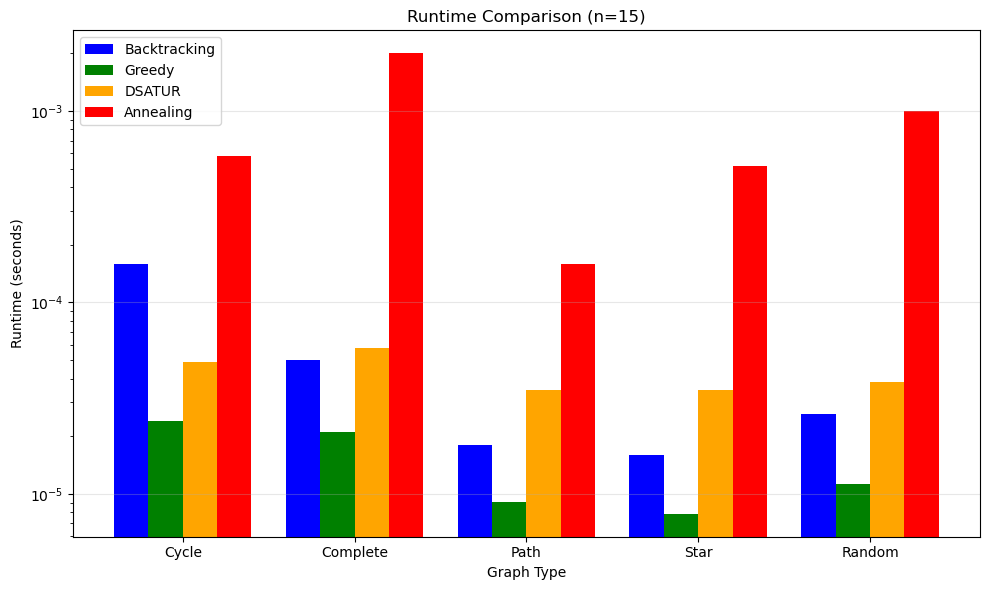

In [108]:
# Use runtime data from Experiment 1
# Extract times from the results dictionary created in Experiment 1
graph_names = ['Cycle', 'Complete', 'Path', 'Star', 'Random']

# Get times from results dictionary (stored in Experiment 1)
bt_times = [
    results['cycle']['bt_time'],
    results['complete']['bt_time'],
    results['path']['bt_time'],
    results['star']['bt_time'],
    results['random']['bt_time']
]
gr_times = [
    results['cycle']['gr_time'],
    results['complete']['gr_time'],
    results['path']['gr_time'],
    results['star']['gr_time'],
    results['random']['gr_time']
]
ds_times = [
    results['cycle']['ds_time'],
    results['complete']['ds_time'],
    results['path']['ds_time'],
    results['star']['ds_time'],
    results['random']['ds_time']
]
sa_times = [
    results['cycle']['sa_time'],
    results['complete']['sa_time'],
    results['path']['sa_time'],
    results['star']['sa_time'],
    results['random']['sa_time']
]

# Plot
fig, ax = plt.subplots(figsize=(10, 6))
x = np.arange(len(graph_names))
width = 0.2

ax.bar(x - 1.5*width, bt_times, width, label='Backtracking', color='blue')
ax.bar(x - 0.5*width, gr_times, width, label='Greedy', color='green')
ax.bar(x + 0.5*width, ds_times, width, label='DSATUR', color='orange')
ax.bar(x + 1.5*width, sa_times, width, label='Annealing', color='red')

ax.set_xlabel('Graph Type')
ax.set_ylabel('Runtime (seconds)')
ax.set_title(f'Runtime Comparison (n={n})')
ax.set_xticks(x)
ax.set_xticklabels(graph_names)
ax.set_yscale('log')  # Log scale since backtracking and annealing can be much slower
ax.legend()
ax.grid(True, alpha=0.3, axis='y')
plt.tight_layout()
plt.show()


## Experiment 3: Scalability - How Runtime Changes with Graph Size

Test each algorithm on cycle graphs of increasing size.


Testing scalability on cycle graphs...
This will test n from 5 to 100 (step size 5)...
  n=5
  n=10
  n=15
  n=20
  n=25
  n=30
  n=35
  n=40
  n=45
  n=50
  n=55
  n=60
  n=65
  n=70
  n=75
  n=80
  n=85
  n=90
  n=95
  n=100


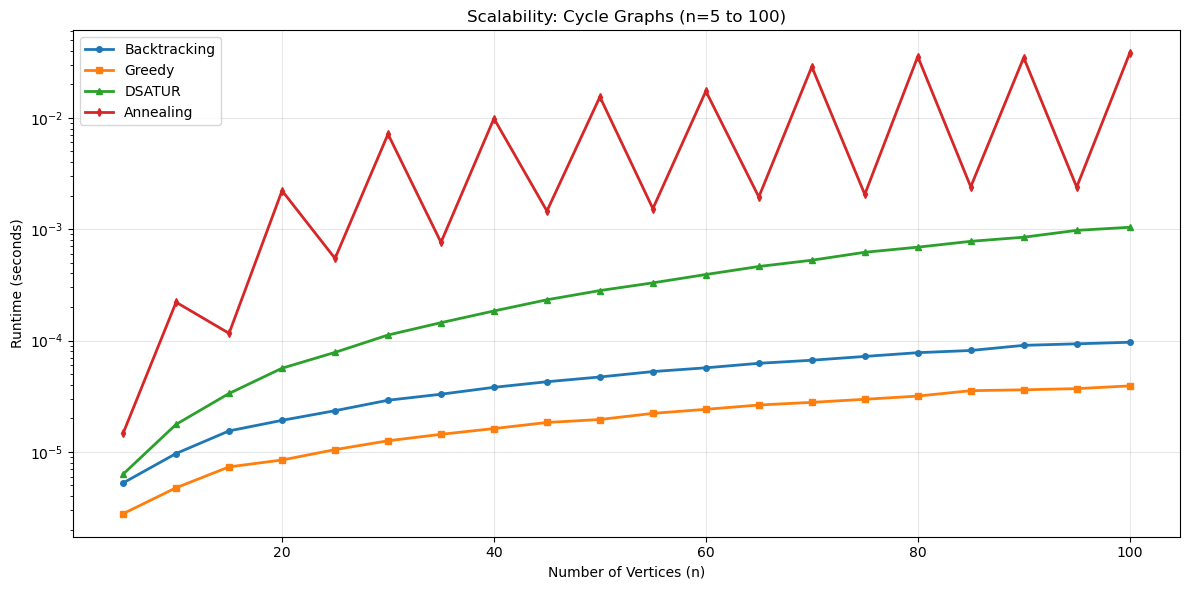

In [109]:
# Test scalability on cycle graphs
# Test from n=5 to n=100, every 5 vertices
print("Testing scalability on cycle graphs...")
print("This will test n from 5 to 100 (step size 5)...")
ns = np.arange(5, 101, 5)  
bt_times = []
gr_times = []
ds_times = []
sa_times = []

for n in ns:
    print(f"  n={n}")
    g = cycle_graph(n)
    bt = backtracking_coloring(g)
    gr = greedy_coloring(g)
    ds = dsatur_coloring(g)
    k = min(bt.num_colors, gr.num_colors, ds.num_colors)
    
    # Run backtracking 10 times and average
    bt_trial_times = []
    for trial in range(10):
        bt = backtracking_coloring(g)
        bt_trial_times.append(bt.time_seconds)
    bt_avg_time = np.mean(bt_trial_times)

    # Run greedy 10 times and average
    gr_trial_times = []
    for trial in range(10):
        gr = greedy_coloring(g)
        gr_trial_times.append(gr.time_seconds)
    gr_avg_time = np.mean(gr_trial_times)

    # Run DSATUR 10 times and average
    ds_trial_times = []
    for trial in range(10):
        ds = dsatur_coloring(g)
        ds_trial_times.append(ds.time_seconds)
    ds_avg_time = np.mean(ds_trial_times)

    # Run annealing 10 times and average
    sa_trial_times = []
    for trial in range(10):
        sa = simulated_annealing(g, k=k)
        sa_trial_times.append(sa.time_seconds)
    sa_avg_time = np.mean(sa_trial_times)
    
    bt_times.append(bt_avg_time)
    gr_times.append(gr_avg_time)
    ds_times.append(ds_avg_time)
    sa_times.append(sa_avg_time)

# Plot
fig, ax = plt.subplots(figsize=(12, 6))
ax.plot(ns, bt_times, marker='o', label='Backtracking', linewidth=2, markersize=4)
ax.plot(ns, gr_times, marker='s', label='Greedy', linewidth=2, markersize=4)
ax.plot(ns, ds_times, marker='^', label='DSATUR', linewidth=2, markersize=4)
ax.plot(ns, sa_times, marker='d', label='Annealing', linewidth=2, markersize=4)

ax.set_xlabel('Number of Vertices (n)')
ax.set_ylabel('Runtime (seconds)')
ax.set_title('Scalability: Cycle Graphs (n=5 to 100)')
ax.set_yscale('log')
ax.legend()
ax.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()


## Experiment 3.5: Investigating Simulated Annealing's Wiggly Pattern

Let's investigate why simulated annealing shows a wiggly/sawtooth pattern in runtime. We'll test only simulated annealing on cycle graphs from n=5 to n=50, running 5 trials per graph size and averaging the results.


Investigating simulated annealing's wiggly pattern
  n=5
    Average time: 0.000017s
  n=6
    Average time: 0.000046s
  n=7
    Average time: 0.000023s
  n=8
    Average time: 0.000138s
  n=9
    Average time: 0.000046s
  n=10
    Average time: 0.000472s
  n=11
    Average time: 0.000048s
  n=12
    Average time: 0.000216s
  n=13
    Average time: 0.000136s
  n=14
    Average time: 0.000620s
  n=15
    Average time: 0.000220s
  n=16
    Average time: 0.001382s
  n=17
    Average time: 0.000236s
  n=18
    Average time: 0.001392s
  n=19
    Average time: 0.000208s
  n=20
    Average time: 0.001626s
  n=21
    Average time: 0.000278s
  n=22
    Average time: 0.001718s
  n=23
    Average time: 0.000555s
  n=24
    Average time: 0.002471s
  n=25
    Average time: 0.000870s
  n=26
    Average time: 0.002184s
  n=27
    Average time: 0.000696s
  n=28
    Average time: 0.004734s
  n=29
    Average time: 0.000835s
  n=30
    Average time: 0.004418s
  n=31
    Average time: 0.000893s
  n=32
  

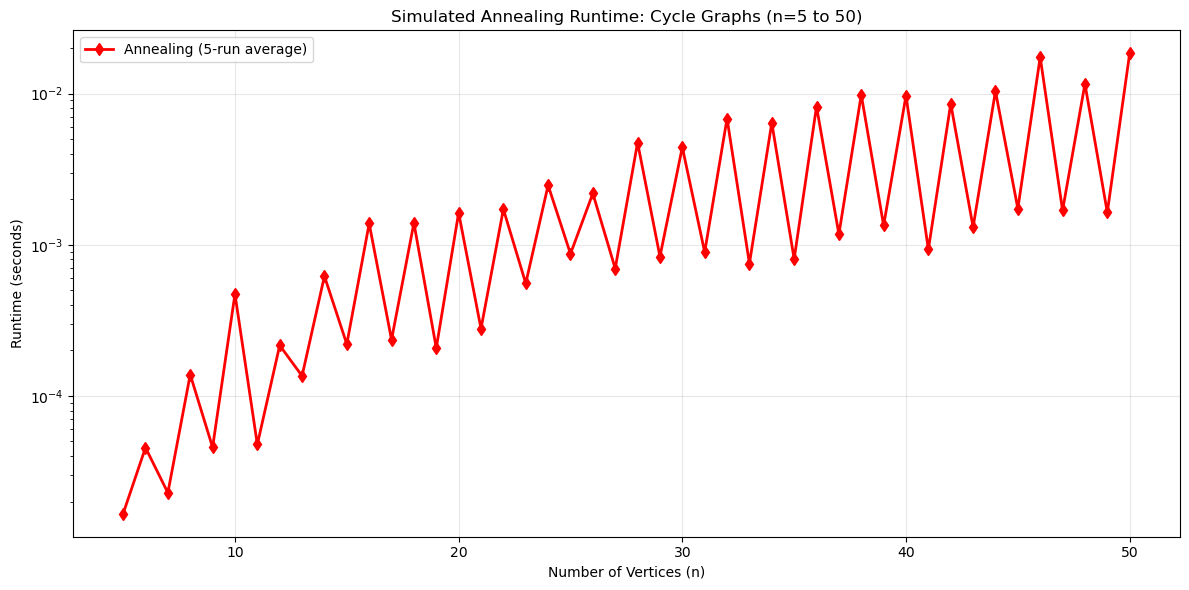


Statistics:
Min runtime: 0.000017s at n=5
Max runtime: 0.018435s at n=50
Average runtime: 0.003155s
Standard deviation: 0.004488s

Even cycles (k=2): Average runtime = 0.005595s
Odd cycles (k=3): Average runtime = 0.000714s
Even cycles take 7.83x longer on average


In [110]:
# Investigate simulated annealing's wiggly pattern
# Test only annealing on cycle graphs from n=5 to n=50
print("Investigating simulated annealing's wiggly pattern")
ns = np.arange(5, 51)
sa_times = []

for n in ns:
    print(f"  n={n}")
    g = cycle_graph(n)
    
    # Determine k for annealing (cycle graphs: 2 color needed for even, 3 color needed for odd)
    k = 2 if n % 2 == 0 else 3
    
    # Run annealing 5 times and average
    sa_trial_times = []
    for trial in range(5):
        sa = simulated_annealing(g, k=k)
        sa_trial_times.append(sa.time_seconds)
    sa_avg_time = np.mean(sa_trial_times)
    sa_times.append(sa_avg_time)
    
    print(f"    Average time: {sa_avg_time:.6f}s")

# Plot only annealing runtime
fig, ax = plt.subplots(figsize=(12, 6))
ax.plot(ns, sa_times, marker='d', label='Annealing (5-run average)', linewidth=2, markersize=6, color='red')

ax.set_xlabel('Number of Vertices (n)')
ax.set_ylabel('Runtime (seconds)')
ax.set_title('Simulated Annealing Runtime: Cycle Graphs (n=5 to 50)')
ax.set_yscale('log')
ax.legend()
ax.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# Also print some statistics
print("\nStatistics:")
print(f"Min runtime: {min(sa_times):.6f}s at n={ns[np.argmin(sa_times)]}")
print(f"Max runtime: {max(sa_times):.6f}s at n={ns[np.argmax(sa_times)]}")
print(f"Average runtime: {np.mean(sa_times):.6f}s")
print(f"Standard deviation: {np.std(sa_times):.6f}s")

# Analyze even vs odd cycles
even_times = [sa_times[i] for i in range(len(ns)) if ns[i] % 2 == 0]
odd_times = [sa_times[i] for i in range(len(ns)) if ns[i] % 2 == 1]
even_ns = [ns[i] for i in range(len(ns)) if ns[i] % 2 == 0]
odd_ns = [ns[i] for i in range(len(ns)) if ns[i] % 2 == 1]

print(f"\nEven cycles (k=2): Average runtime = {np.mean(even_times):.6f}s")
print(f"Odd cycles (k=3): Average runtime = {np.mean(odd_times):.6f}s")
print(f"Even cycles take {np.mean(even_times)/np.mean(odd_times):.2f}x longer on average")


### Why do even cycles (k=2) take longer than odd cycles (k=3)?


In [111]:
import random
from src.annealing import count_conflicts

print("Investigating why even cycles take longer")

# Test a few examples
test_sizes = [10, 15, 20, 25]  # Mix of even and odd

for n in test_sizes:
    g = cycle_graph(n)
    k = 2 if n % 2 == 0 else 3
    cycle_type = "even" if n % 2 == 0 else "odd"
    
    print(f"\nn={n} ({cycle_type} cycle, k={k}):")
    
    # Run 5 trials and collect detailed stats
    initial_conflicts = []
    final_conflicts = []
    iterations_used = []
    success_count = 0
    
    for trial in range(5):
        # Create a random initial coloring
        colors = [random.randint(0, k - 1) for _ in range(n)]
        initial_conf = count_conflicts(g, colors)
        initial_conflicts.append(initial_conf)
        
        # Run annealing
        sa = simulated_annealing(g, k=k, max_iter=20000)
        
        if sa.coloring:
            success_count += 1
            final_conflicts.append(0)
        else:
            final_conflicts.append(sa.conflicts)
        
    
    avg_initial = np.mean(initial_conflicts)
    print(f"  Average initial conflicts: {avg_initial:.1f} (out of {n} edges)")
    print(f"  Success rate: {success_count}/5")
    print(f"  Average runtime: {np.mean([simulated_annealing(g, k=k).time_seconds for _ in range(5)]):.6f}s")
    
    # With k=2, there are only 2 colors, so the search space is more constrained
    # With k=3, even though we need 3 colors, we have more flexibility to escape local minima
    print(f"  Search space: 2^{n} = {2**n} possible colorings (k=2) vs 3^{n} = {3**n} possible colorings (k=3)")


Investigating why even cycles take longer

n=10 (even cycle, k=2):
  Average initial conflicts: 5.2 (out of 10 edges)
  Success rate: 5/5
  Average runtime: 0.000184s
  Search space: 2^10 = 1024 possible colorings (k=2) vs 3^10 = 59049 possible colorings (k=3)

n=15 (odd cycle, k=3):
  Average initial conflicts: 5.4 (out of 15 edges)
  Success rate: 5/5
  Average runtime: 0.000115s
  Search space: 2^15 = 32768 possible colorings (k=2) vs 3^15 = 14348907 possible colorings (k=3)

n=20 (even cycle, k=2):
  Average initial conflicts: 9.6 (out of 20 edges)
  Success rate: 5/5
  Average runtime: 0.001437s
  Search space: 2^20 = 1048576 possible colorings (k=2) vs 3^20 = 3486784401 possible colorings (k=3)

n=25 (odd cycle, k=3):
  Average initial conflicts: 9.6 (out of 25 edges)
  Success rate: 5/5
  Average runtime: 0.000584s
  Search space: 2^25 = 33554432 possible colorings (k=2) vs 3^25 = 847288609443 possible colorings (k=3)


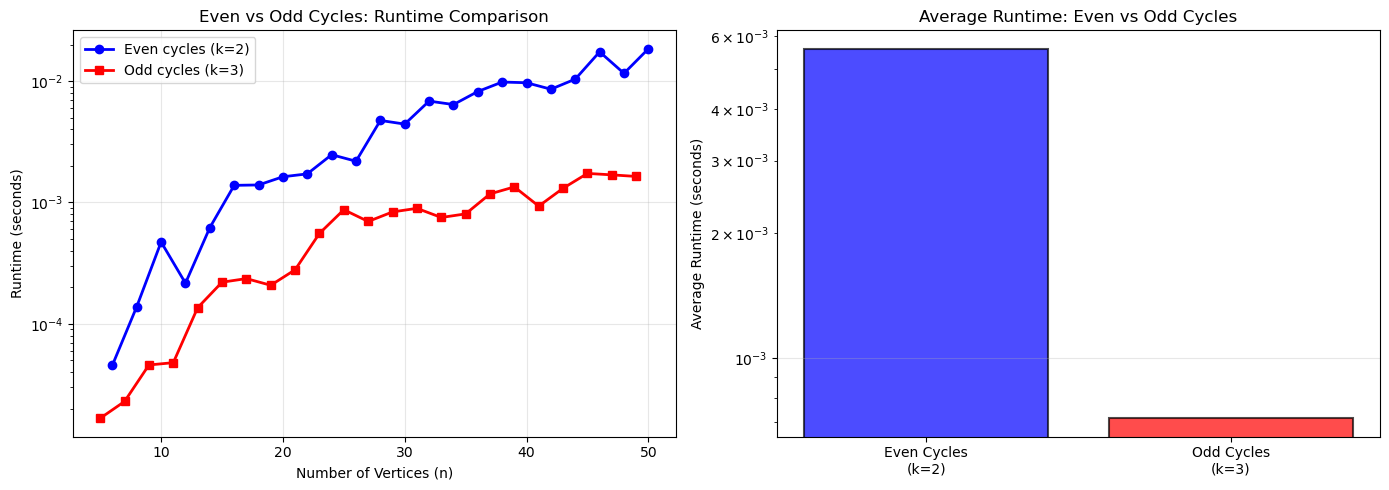

In [112]:
# Visualize the even vs odd pattern
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))

# Plot 1: Separate even and odd on same plot
ax1.plot(even_ns, even_times, marker='o', label='Even cycles (k=2)', linewidth=2, markersize=6, color='blue')
ax1.plot(odd_ns, odd_times, marker='s', label='Odd cycles (k=3)', linewidth=2, markersize=6, color='red')
ax1.set_xlabel('Number of Vertices (n)')
ax1.set_ylabel('Runtime (seconds)')
ax1.set_title('Even vs Odd Cycles: Runtime Comparison')
ax1.set_yscale('log')
ax1.legend()
ax1.grid(True, alpha=0.3)

# Plot 2: Bar chart comparing averages
categories = ['Even Cycles\n(k=2)', 'Odd Cycles\n(k=3)']
avg_times = [np.mean(even_times), np.mean(odd_times)]
colors_bar = ['blue', 'red']
bars = ax2.bar(categories, avg_times, color=colors_bar, alpha=0.7, edgecolor='black', linewidth=1.5)
ax2.set_ylabel('Average Runtime (seconds)')
ax2.set_title('Average Runtime: Even vs Odd Cycles')
ax2.set_yscale('log')
ax2.grid(True, alpha=0.3, axis='y')

plt.tight_layout()
plt.show()


Visualization shows:
- Even cycles (blue): Require k=2, but take LONGER
- Odd cycles (red): Require k=3, but take SHORTER

This is because k=2 creates a more constrained search space, making it harder for simulated annealing to escape local minima.

## Experiment 4: Solution Quality - How Close Are Heuristics to Optimal?

Compare greedy and DSATUR against backtracking (optimal) on random graphs with different sizes (n) and edge probabilities (p). Random graphs provide more challenging test cases where the optimal solution is not obvious.


Comparing heuristics against optimal (backtracking) on random graphs

Testing n=15, p=0.3...
  Average Greedy/Optimal ratio: 1.067
  Average DSATUR/Optimal ratio: 1.000

Testing n=15, p=0.5...
  Average Greedy/Optimal ratio: 1.073
  Average DSATUR/Optimal ratio: 1.000

Testing n=15, p=0.7...
  Average Greedy/Optimal ratio: 1.033
  Average DSATUR/Optimal ratio: 1.000

Testing n=20, p=0.3...
  Average Greedy/Optimal ratio: 1.150
  Average DSATUR/Optimal ratio: 1.150

Testing n=20, p=0.5...
  Average Greedy/Optimal ratio: 1.153
  Average DSATUR/Optimal ratio: 1.120

Testing n=20, p=0.7...
  Average Greedy/Optimal ratio: 1.076
  Average DSATUR/Optimal ratio: 1.000

Testing n=25, p=0.3...
  Average Greedy/Optimal ratio: 1.170
  Average DSATUR/Optimal ratio: 1.050

Testing n=25, p=0.5...
  Average Greedy/Optimal ratio: 1.190
  Average DSATUR/Optimal ratio: 1.029

Summary Statistics:
Average Greedy/Optimal ratio: 1.114
Average DSATUR/Optimal ratio: 1.044
Best Greedy ratio: 1.033 (closest to o

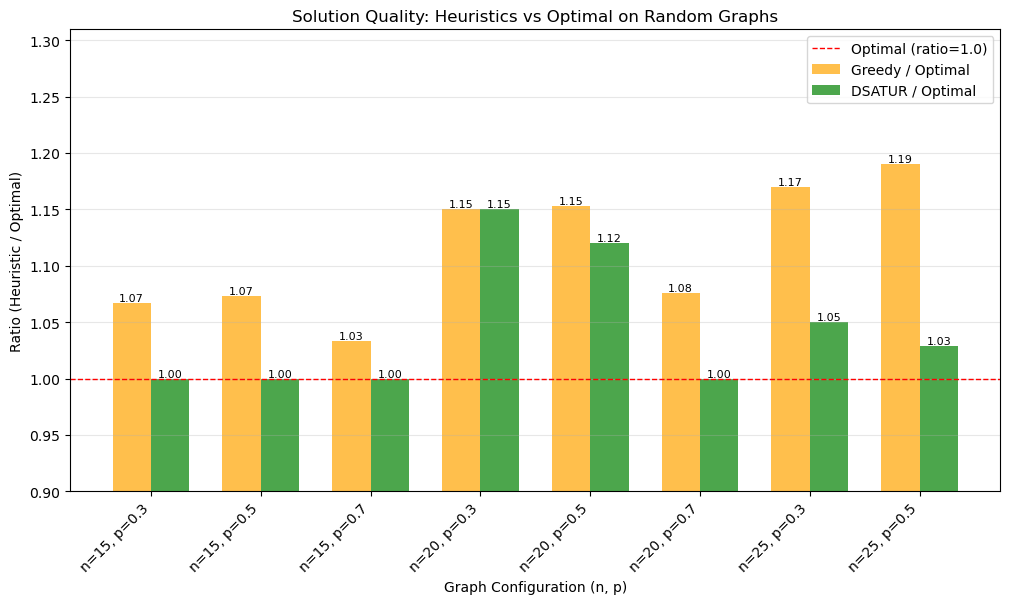

In [113]:
# Compare heuristics against optimal (backtracking) on random graphs
# Test different graph sizes (n) and edge probabilities (p)
print("Comparing heuristics against optimal (backtracking) on random graphs")

# Test different combinations of n and p
test_configs = [
    (15, 0.3),
    (15, 0.5),
    (15, 0.7),
    (20, 0.3),
    (20, 0.5),
    (20, 0.7),
    (25, 0.3),
    (25, 0.5),
]

trials = 5  # Number of random graphs to test per configuration

results = []
for n, p in test_configs:
    print(f"\nTesting n={n}, p={p}...")
    greedy_ratios = []
    dsatur_ratios = []
    
    for trial in range(trials):
        g = random_graph(n, p)
        
        # Run all three algorithms
        bt = backtracking_coloring(g)
        gr = greedy_coloring(g)
        ds = dsatur_coloring(g)
        
        # Calculate ratios (heuristic / optimal)
        if bt.num_colors > 0:  # Avoid division by zero
            greedy_ratios.append(gr.num_colors / bt.num_colors)
            dsatur_ratios.append(ds.num_colors / bt.num_colors)
    
    avg_greedy_ratio = np.mean(greedy_ratios)
    avg_dsatur_ratio = np.mean(dsatur_ratios)
    
    results.append({
        'n': n,
        'p': p,
        'greedy_ratio': avg_greedy_ratio,
        'dsatur_ratio': avg_dsatur_ratio
    })
    
    print(f"  Average Greedy/Optimal ratio: {avg_greedy_ratio:.3f}")
    print(f"  Average DSATUR/Optimal ratio: {avg_dsatur_ratio:.3f}")


# Create visualization
fig, ax = plt.subplots(figsize=(12, 6))
# Extract data for plotting
config_labels = [f"n={r['n']}, p={r['p']}" for r in results]
greedy_ratios_plot = [r['greedy_ratio'] for r in results]
dsatur_ratios_plot = [r['dsatur_ratio'] for r in results]

# Plot 1: Bar chart comparing ratios
x = np.arange(len(config_labels))
width = 0.35

bars1 = ax.bar(x - width/2, greedy_ratios_plot, width, label='Greedy / Optimal', color='orange', alpha=0.7)
bars2 = ax.bar(x + width/2, dsatur_ratios_plot, width, label='DSATUR / Optimal', color='green', alpha=0.7)

ax.set_xlabel('Graph Configuration (n, p)')
ax.set_ylabel('Ratio (Heuristic / Optimal)')
ax.set_title('Solution Quality: Heuristics vs Optimal on Random Graphs')
ax.set_xticks(x)
ax.set_xticklabels(config_labels, rotation=45, ha='right')
ax.axhline(y=1.0, color='r', linestyle='--', linewidth=1, label='Optimal (ratio=1.0)')
ax.legend()
ax.grid(True, alpha=0.3, axis='y')
ax.set_ylim([0.9, max(max(greedy_ratios_plot), max(dsatur_ratios_plot)) * 1.1])

# Add value labels on bars
for bars in [bars1, bars2]:
    for bar in bars:
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2., height,
                f'{height:.2f}',
                ha='center', va='bottom', fontsize=8)

# Print summary statistics
print("\nSummary Statistics:")
print(f"Average Greedy/Optimal ratio: {np.mean(greedy_ratios_plot):.3f}")
print(f"Average DSATUR/Optimal ratio: {np.mean(dsatur_ratios_plot):.3f}")
print(f"Best Greedy ratio: {min(greedy_ratios_plot):.3f} (closest to optimal)")
print(f"Best DSATUR ratio: {min(dsatur_ratios_plot):.3f} (closest to optimal)")
print(f"\nNote: A ratio of 1.0 means the heuristic found the optimal solution.")
print(f"      A ratio > 1.0 means the heuristic used more colors than optimal.")


## Experiment 5: Effect of Graph Density

Test on random graphs with different edge probabilities (density).


Testing p=0.1
Testing p=0.2
Testing p=0.3
Testing p=0.4
Testing p=0.5
Testing p=0.6
Testing p=0.7
Testing p=0.8
Testing p=0.9


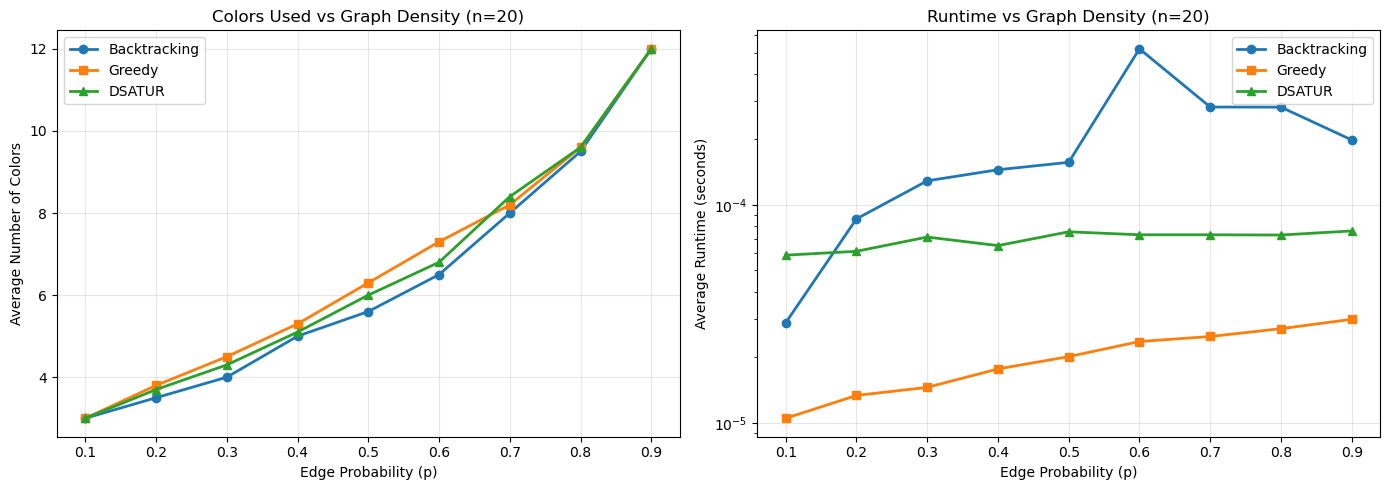

In [114]:
# Test on random graphs with different densities
n = 20
ps = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
trials = 10

bt_avg_colors = []
gr_avg_colors = []
ds_avg_colors = []
bt_avg_times = []
gr_avg_times = []
ds_avg_times = []

for p in ps:
    print(f"Testing p={p}")
    bt_colors, bt_times = [], []
    gr_colors, gr_times = [], []
    ds_colors, ds_times = [], []
    
    for _ in range(trials):
        g = random_graph(n, p)
        bt = backtracking_coloring(g)
        gr = greedy_coloring(g)
        ds = dsatur_coloring(g)
        
        bt_colors.append(bt.num_colors)
        bt_times.append(bt.time_seconds)
        gr_colors.append(gr.num_colors)
        gr_times.append(gr.time_seconds)
        ds_colors.append(ds.num_colors)
        ds_times.append(ds.time_seconds)
    
    bt_avg_colors.append(np.mean(bt_colors))
    gr_avg_colors.append(np.mean(gr_colors))
    ds_avg_colors.append(np.mean(ds_colors))
    bt_avg_times.append(np.mean(bt_times))
    gr_avg_times.append(np.mean(gr_times))
    ds_avg_times.append(np.mean(ds_times))

# Plot
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))

# Colors vs density
ax1.plot(ps, bt_avg_colors, marker='o', label='Backtracking', linewidth=2)
ax1.plot(ps, gr_avg_colors, marker='s', label='Greedy', linewidth=2)
ax1.plot(ps, ds_avg_colors, marker='^', label='DSATUR', linewidth=2)
ax1.set_xlabel('Edge Probability (p)')
ax1.set_ylabel('Average Number of Colors')
ax1.set_title(f'Colors Used vs Graph Density (n={n})')
ax1.legend()
ax1.grid(True, alpha=0.3)

# Runtime vs density
ax2.plot(ps, bt_avg_times, marker='o', label='Backtracking', linewidth=2)
ax2.plot(ps, gr_avg_times, marker='s', label='Greedy', linewidth=2)
ax2.plot(ps, ds_avg_times, marker='^', label='DSATUR', linewidth=2)
ax2.set_xlabel('Edge Probability (p)')
ax2.set_ylabel('Average Runtime (seconds)')
ax2.set_title(f'Runtime vs Graph Density (n={n})')
ax2.set_yscale('log')
ax2.legend()
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()


## Experiment 6: Vertex Ordering Strategies - Natural Order vs Degree-Based Ordering

Compare two vertex ordering strategies for backtracking:
- Natural order (0, 1, 2, ...): Colors vertices in their original order
- Degree-based ordering: Colors vertices with highest degree first

We'll test both strategies on random graphs with different sizes and densities to see which performs better.


In [115]:
# Compare natural order vs degree-based ordering
# Test on random graphs with different sizes
print("Comparing vertex ordering strategies")
print("Testing on random graphs with different sizes (n) and edge probabilities (p)")

# Test different graph sizes and densities
ns = [10, 15, 20, 25]
ps = [0.3, 0.5, 0.7]
trials = 5

natural_times = []
degree_times = []
natural_colors = []
degree_colors = []
natural_nodes = []
degree_nodes = []
configs = []

for n in ns:
    for p in ps:
        print(f"  Testing n={n}, p={p}")
        configs.append(f"n={n}, p={p}")
        
        nat_times, nat_colors, nat_nodes = [], [], []
        deg_times, deg_colors, deg_nodes = [], [], []
        
        for _ in range(trials):
            g = random_graph(n, p)
            
            # Natural order (use_degree_order=False)
            nat = backtracking_coloring(g, use_degree_order=False)
            nat_times.append(nat.time_seconds)
            nat_colors.append(nat.num_colors)
            nat_nodes.append(nat.nodes_visited)
            
            # Degree-based order (use_degree_order=True)
            deg = backtracking_coloring(g, use_degree_order=True)
            deg_times.append(deg.time_seconds)
            deg_colors.append(deg.num_colors)
            deg_nodes.append(deg.nodes_visited)
        
        natural_times.append(np.mean(nat_times))
        degree_times.append(np.mean(deg_times))
        natural_colors.append(np.mean(nat_colors))
        degree_colors.append(np.mean(deg_colors))
        natural_nodes.append(np.mean(nat_nodes))
        degree_nodes.append(np.mean(deg_nodes))


Comparing vertex ordering strategies
Testing on random graphs with different sizes (n) and edge probabilities (p)
  Testing n=10, p=0.3
  Testing n=10, p=0.5
  Testing n=10, p=0.7
  Testing n=15, p=0.3
  Testing n=15, p=0.5
  Testing n=15, p=0.7
  Testing n=20, p=0.3
  Testing n=20, p=0.5
  Testing n=20, p=0.7
  Testing n=25, p=0.3
  Testing n=25, p=0.5
  Testing n=25, p=0.7


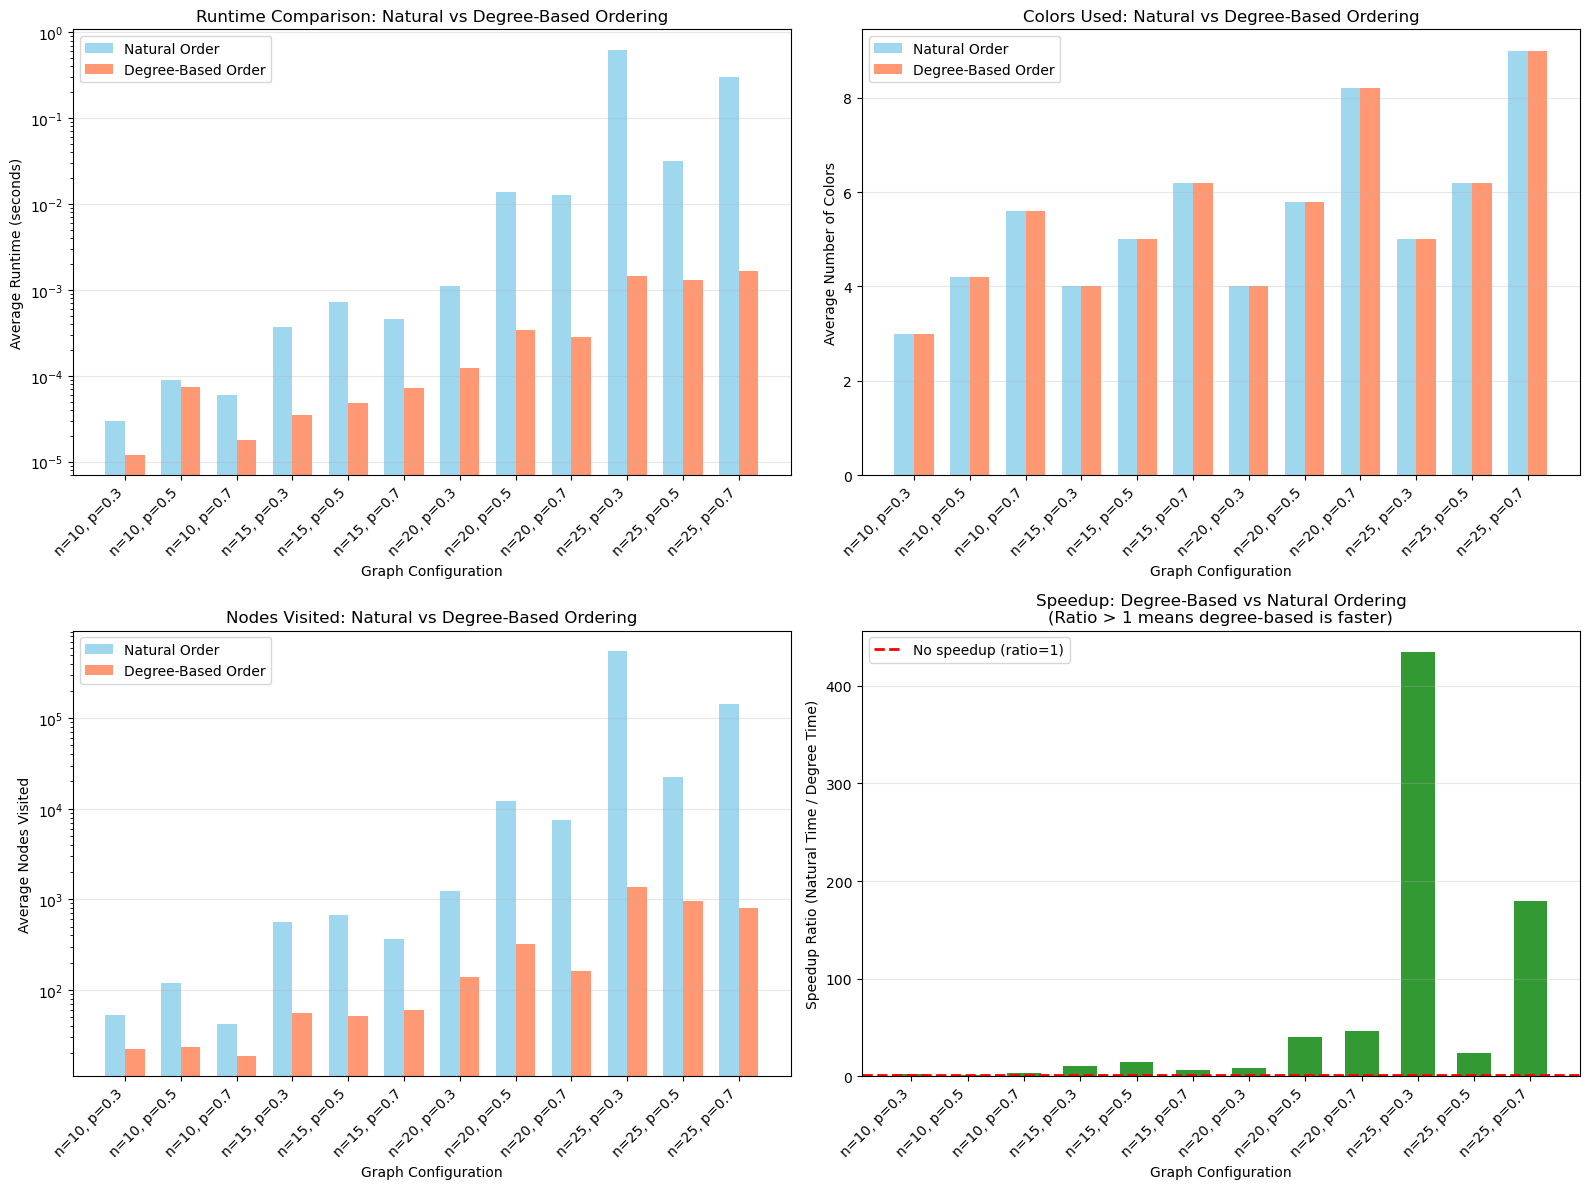


Summary Statistics:
Average runtime - Natural order: 0.082563s
Average runtime - Degree-based: 0.000453s
Average speedup: 64.42x

Average colors - Natural order: 5.52
Average colors - Degree-based: 5.52

Average nodes visited - Natural order: 61900
Average nodes visited - Degree-based: 332
Average reduction in nodes visited: 99.5%


In [116]:
# Visualize the comparison
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

x_pos = np.arange(len(configs))
width = 0.35

# Plot 1: Runtime comparison
ax1 = axes[0, 0]
ax1.bar(x_pos - width/2, natural_times, width, label='Natural Order', alpha=0.8, color='skyblue')
ax1.bar(x_pos + width/2, degree_times, width, label='Degree-Based Order', alpha=0.8, color='coral')
ax1.set_xlabel('Graph Configuration')
ax1.set_ylabel('Average Runtime (seconds)')
ax1.set_title('Runtime Comparison: Natural vs Degree-Based Ordering')
ax1.set_xticks(x_pos)
ax1.set_xticklabels(configs, rotation=45, ha='right')
ax1.set_yscale('log')
ax1.legend()
ax1.grid(True, alpha=0.3, axis='y')

# Plot 2: Number of colors comparison
ax2 = axes[0, 1]
ax2.bar(x_pos - width/2, natural_colors, width, label='Natural Order', alpha=0.8, color='skyblue')
ax2.bar(x_pos + width/2, degree_colors, width, label='Degree-Based Order', alpha=0.8, color='coral')
ax2.set_xlabel('Graph Configuration')
ax2.set_ylabel('Average Number of Colors')
ax2.set_title('Colors Used: Natural vs Degree-Based Ordering')
ax2.set_xticks(x_pos)
ax2.set_xticklabels(configs, rotation=45, ha='right')
ax2.legend()
ax2.grid(True, alpha=0.3, axis='y')

# Plot 3: Nodes visited comparison
ax3 = axes[1, 0]
ax3.bar(x_pos - width/2, natural_nodes, width, label='Natural Order', alpha=0.8, color='skyblue')
ax3.bar(x_pos + width/2, degree_nodes, width, label='Degree-Based Order', alpha=0.8, color='coral')
ax3.set_xlabel('Graph Configuration')
ax3.set_ylabel('Average Nodes Visited')
ax3.set_title('Nodes Visited: Natural vs Degree-Based Ordering')
ax3.set_xticks(x_pos)
ax3.set_xticklabels(configs, rotation=45, ha='right')
ax3.set_yscale('log')
ax3.legend()
ax3.grid(True, alpha=0.3, axis='y')

# Plot 4: Speedup ratio (natural_time / degree_time)
ax4 = axes[1, 1]
speedup = [nat / deg if deg > 0 else 1 for nat, deg in zip(natural_times, degree_times)]
ax4.bar(x_pos, speedup, width=0.6, alpha=0.8, color='green')
ax4.axhline(y=1, color='red', linestyle='--', linewidth=2, label='No speedup (ratio=1)')
ax4.set_xlabel('Graph Configuration')
ax4.set_ylabel('Speedup Ratio (Natural Time / Degree Time)')
ax4.set_title('Speedup: Degree-Based vs Natural Ordering\n(Ratio > 1 means degree-based is faster)')
ax4.set_xticks(x_pos)
ax4.set_xticklabels(configs, rotation=45, ha='right')
ax4.legend()
ax4.grid(True, alpha=0.3, axis='y')

plt.tight_layout()
plt.show()

# Print summary statistics
print("\nSummary Statistics:")
print(f"Average runtime - Natural order: {np.mean(natural_times):.6f}s")
print(f"Average runtime - Degree-based: {np.mean(degree_times):.6f}s")
print(f"Average speedup: {np.mean(speedup):.2f}x")
print(f"\nAverage colors - Natural order: {np.mean(natural_colors):.2f}")
print(f"Average colors - Degree-based: {np.mean(degree_colors):.2f}")
print(f"\nAverage nodes visited - Natural order: {np.mean(natural_nodes):.0f}")
print(f"Average nodes visited - Degree-based: {np.mean(degree_nodes):.0f}")
print(f"Average reduction in nodes visited: {(1 - np.mean(degree_nodes)/np.mean(natural_nodes))*100:.1f}%")


## Experiment 7: Greedy Algorithm - Natural Order vs Degree-Based Ordering

Now let's test how vertex ordering affects the Greedy algorithm. Unlike backtracking, greedy doesn't explore multiple paths, but the order in which vertices are colored can affect the number of colors used.


In [117]:
# Compare natural order vs degree-based ordering for Greedy algorithm
print("Comparing vertex ordering strategies for Greedy algorithm")
print("Testing on random graphs with different sizes (n) and edge probabilities (p)")

# Test different graph sizes and densities
ns = [10, 15, 20, 25]
ps = [0.3, 0.5, 0.7]
trials = 5

gr_nat_times = []
gr_deg_times = []
gr_nat_colors = []
gr_deg_colors = []
configs = []

for n in ns:
    for p in ps:
        print(f"  Testing n={n}, p={p}...")
        configs.append(f"n={n}, p={p}")
        
        nat_times, nat_colors = [], []
        deg_times, deg_colors = [], []
        
        for _ in range(trials):
            g = random_graph(n, p)
            
            # Natural order (use_degree_order=False)
            gr_nat = greedy_coloring(g, use_degree_order=False)
            nat_times.append(gr_nat.time_seconds)
            nat_colors.append(gr_nat.num_colors)
            
            # Degree-based order (use_degree_order=True)
            gr_deg = greedy_coloring(g, use_degree_order=True)
            deg_times.append(gr_deg.time_seconds)
            deg_colors.append(gr_deg.num_colors)
        
        gr_nat_times.append(np.mean(nat_times))
        gr_deg_times.append(np.mean(deg_times))
        gr_nat_colors.append(np.mean(nat_colors))
        gr_deg_colors.append(np.mean(deg_colors))


Comparing vertex ordering strategies for Greedy algorithm
Testing on random graphs with different sizes (n) and edge probabilities (p)
  Testing n=10, p=0.3...
  Testing n=10, p=0.5...
  Testing n=10, p=0.7...
  Testing n=15, p=0.3...
  Testing n=15, p=0.5...
  Testing n=15, p=0.7...
  Testing n=20, p=0.3...
  Testing n=20, p=0.5...
  Testing n=20, p=0.7...
  Testing n=25, p=0.3...
  Testing n=25, p=0.5...
  Testing n=25, p=0.7...


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


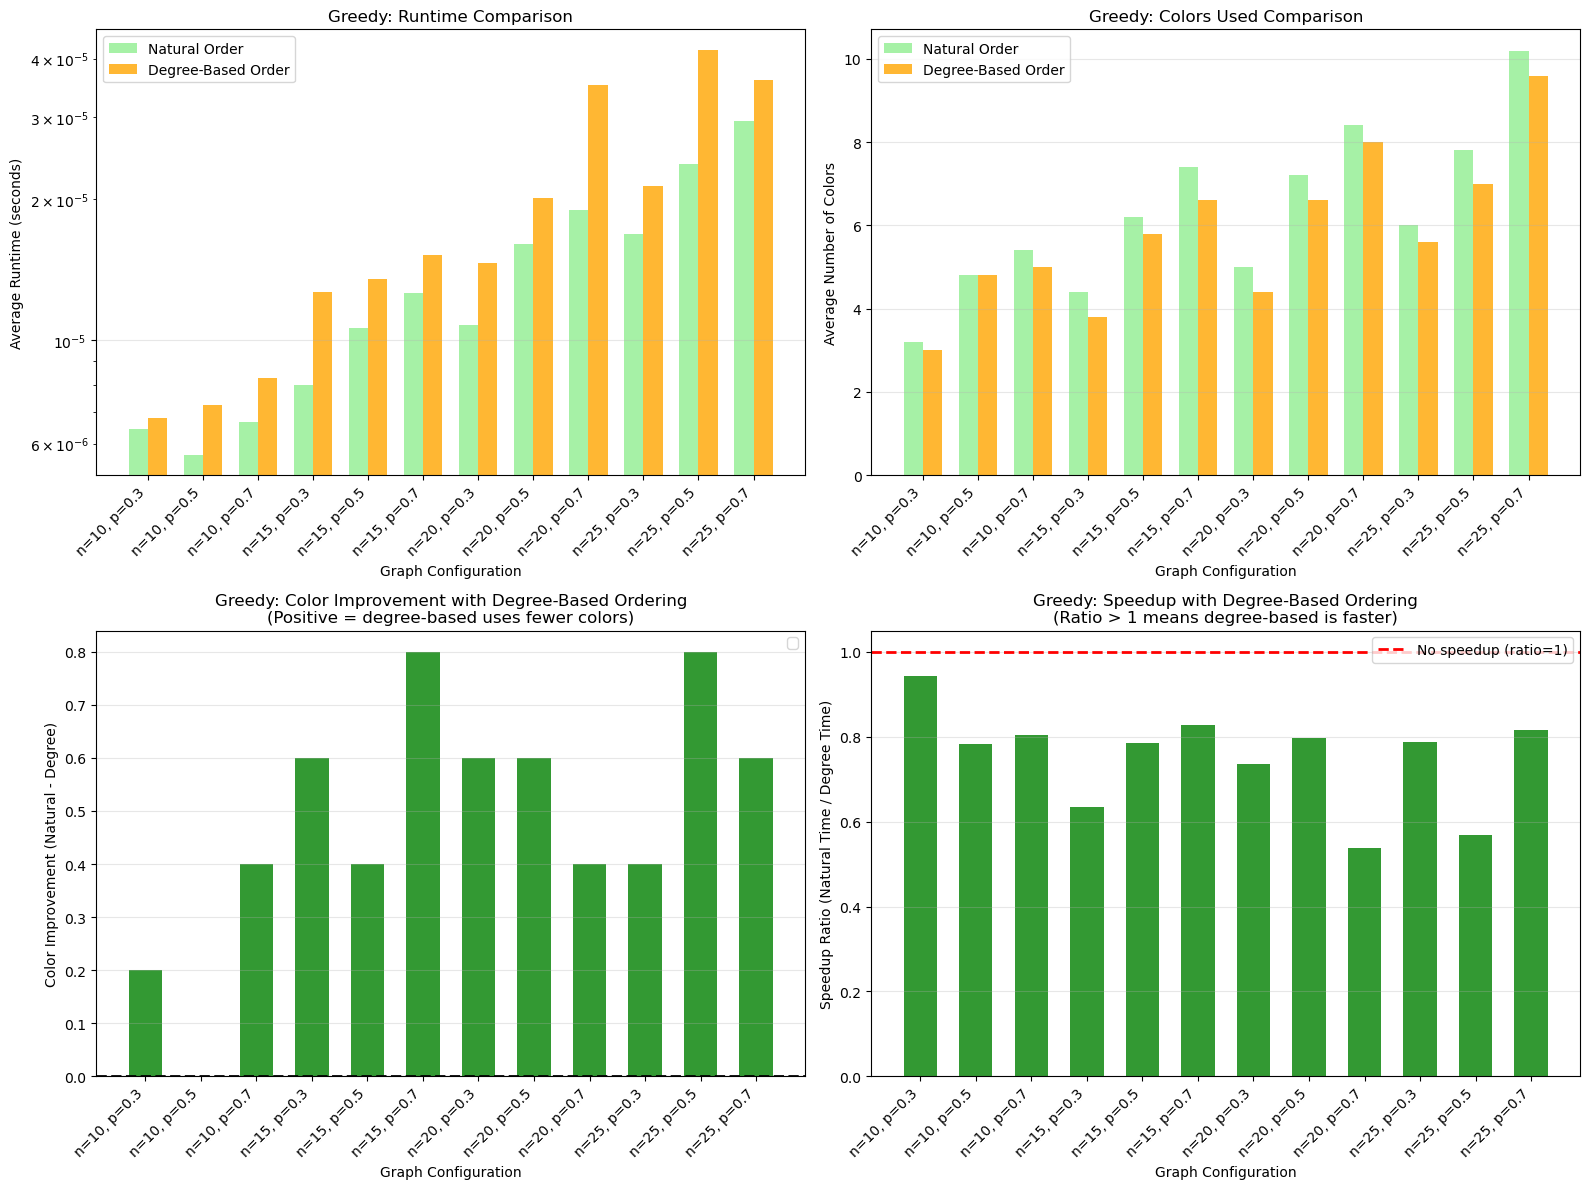

GREEDY ALGORITHM - SUMMARY STATISTICS

Average runtime - Natural order: 0.000014s
Average runtime - Degree-based: 0.000019s
Average speedup: 0.75x

Average colors - Natural order: 6.33
Average colors - Degree-based: 5.85
Average improvement: 0.48 colors
Percentage improvement: 7.6%

Configurations where degree-based is better: 11/12
Configurations where natural order is better: 0/12
Configurations with same result: 1/12


In [118]:
# Visualize the comparison for Greedy algorithm
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

x_pos = np.arange(len(configs))
width = 0.35

# Plot 1: Runtime comparison
ax1 = axes[0, 0]
ax1.bar(x_pos - width/2, gr_nat_times, width, label='Natural Order', alpha=0.8, color='lightgreen')
ax1.bar(x_pos + width/2, gr_deg_times, width, label='Degree-Based Order', alpha=0.8, color='orange')
ax1.set_xlabel('Graph Configuration')
ax1.set_ylabel('Average Runtime (seconds)')
ax1.set_title('Greedy: Runtime Comparison')
ax1.set_xticks(x_pos)
ax1.set_xticklabels(configs, rotation=45, ha='right')
ax1.set_yscale('log')
ax1.legend()
ax1.grid(True, alpha=0.3, axis='y')

# Plot 2: Number of colors comparison
ax2 = axes[0, 1]
ax2.bar(x_pos - width/2, gr_nat_colors, width, label='Natural Order', alpha=0.8, color='lightgreen')
ax2.bar(x_pos + width/2, gr_deg_colors, width, label='Degree-Based Order', alpha=0.8, color='orange')
ax2.set_xlabel('Graph Configuration')
ax2.set_ylabel('Average Number of Colors')
ax2.set_title('Greedy: Colors Used Comparison')
ax2.set_xticks(x_pos)
ax2.set_xticklabels(configs, rotation=45, ha='right')
ax2.legend()
ax2.grid(True, alpha=0.3, axis='y')

# Plot 3: Color improvement (difference)
ax3 = axes[1, 0]
color_improvement = [nat - deg for nat, deg in zip(gr_nat_colors, gr_deg_colors)]
colors_bar = ['green' if x > 0 else 'red' if x < 0 else 'gray' for x in color_improvement]
ax3.bar(x_pos, color_improvement, width=0.6, alpha=0.8, color=colors_bar)
ax3.axhline(y=0, color='black', linestyle='--', linewidth=2)
ax3.set_xlabel('Graph Configuration')
ax3.set_ylabel('Color Improvement (Natural - Degree)')
ax3.set_title('Greedy: Color Improvement with Degree-Based Ordering\n(Positive = degree-based uses fewer colors)')
ax3.set_xticks(x_pos)
ax3.set_xticklabels(configs, rotation=45, ha='right')
ax3.legend()
ax3.grid(True, alpha=0.3, axis='y')

# Plot 4: Speedup ratio (natural_time / degree_time)
ax4 = axes[1, 1]
speedup = [nat / deg if deg > 0 else 1 for nat, deg in zip(gr_nat_times, gr_deg_times)]
ax4.bar(x_pos, speedup, width=0.6, alpha=0.8, color='green')
ax4.axhline(y=1, color='red', linestyle='--', linewidth=2, label='No speedup (ratio=1)')
ax4.set_xlabel('Graph Configuration')
ax4.set_ylabel('Speedup Ratio (Natural Time / Degree Time)')
ax4.set_title('Greedy: Speedup with Degree-Based Ordering\n(Ratio > 1 means degree-based is faster)')
ax4.set_xticks(x_pos)
ax4.set_xticklabels(configs, rotation=45, ha='right')
ax4.legend()
ax4.grid(True, alpha=0.3, axis='y')

plt.tight_layout()
plt.show()

# Print summary statistics
print("GREEDY ALGORITHM - SUMMARY STATISTICS")
print(f"\nAverage runtime - Natural order: {np.mean(gr_nat_times):.6f}s")
print(f"Average runtime - Degree-based: {np.mean(gr_deg_times):.6f}s")
print(f"Average speedup: {np.mean(speedup):.2f}x")
print(f"\nAverage colors - Natural order: {np.mean(gr_nat_colors):.2f}")
print(f"Average colors - Degree-based: {np.mean(gr_deg_colors):.2f}")
print(f"Average improvement: {np.mean(gr_nat_colors) - np.mean(gr_deg_colors):.2f} colors")
print(f"Percentage improvement: {((np.mean(gr_nat_colors) - np.mean(gr_deg_colors)) / np.mean(gr_nat_colors) * 100):.1f}%")
print(f"\nConfigurations where degree-based is better: {sum(1 for x in color_improvement if x > 0)}/{len(color_improvement)}")
print(f"Configurations where natural order is better: {sum(1 for x in color_improvement if x < 0)}/{len(color_improvement)}")
print(f"Configurations with same result: {sum(1 for x in color_improvement if x == 0)}/{len(color_improvement)}")
